<a href="https://colab.research.google.com/github/guineapig987/Python_Quest_KimTaeWon/blob/master/mainQuest_deepL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [40]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(train_data.shape)
print(len(test_data))

323
(323, 13)
102


In [41]:
import numpy as np
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = np.mean(train_data, axis=0)
train_std = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
std = np.std(train_data, axis=0)
train_std = train_std / std

# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
print('표준화된 train 데이터의 평균과 표준편차')
print(np.mean(train_std, axis=0))
print(train_std.std(axis=0))

print('-'*100)
# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
mean = np.mean(test_data, axis=0)
std = np.std(test_data, axis=0)
test_std = (test_data - mean) / std
print('표준화된 test 데이터의 평균과 표준편차')
print(test_std.mean(axis=0))
print(test_std.std(axis=0))

# 검증 데이터 표준화
mean = np.mean(val_data, axis=0)
std = np.std(val_data, axis=0)
val_data = (val_data - mean) / std


표준화된 train 데이터의 평균과 표준편차
[-4.46838988e-18 -6.39323475e-17  3.35567487e-15  5.91202354e-17
 -3.32293532e-16  5.64374828e-15 -1.44328993e-15 -1.05264954e-17
 -1.56393646e-16 -1.37145197e-16  2.06522321e-14  4.21592585e-15
 -4.12434534e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
----------------------------------------------------------------------------------------------------
표준화된 test 데이터의 평균과 표준편차
[-1.37417311e-16 -1.08845395e-17 -5.35519341e-16 -2.44902138e-17
  6.46541644e-16 -1.55812182e-15  1.82860263e-16  1.95921710e-17
 -1.74152631e-17 -4.08170230e-18 -3.91190348e-15 -3.20440842e-15
  8.71851611e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [45]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='adam',loss='mse', metrics='mae')

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                896       
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
11/11 [==============================] - 1s 29ms/step - loss: 612.5281 - mae: 22.8083 - val_loss: 457.9308 - val_mae: 20.1479
Epoch 2/100
11/11 [==============================] - 0s 9ms/step - loss: 582.2507 - mae: 22.1487 - val_loss: 430.5545 - val_mae: 19.4755
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 549.6682 - mae: 21.3991 - val_loss: 397.6560 - val_mae: 18.6381
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 508.9044 - mae: 20.4703 - val_loss: 356.5186 - val_mae: 17.5493
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 457.7136 - mae: 19.1840 - val_loss: 304.9332 - val_mae: 16.0919
Epoch 6/100
11/11 [==============================] - 0s 8ms/step - loss: 386.5063 - mae: 17.4101 - val_loss: 243.7319 - val_mae: 14.1662
Epoch 7/100
11/11 [==============================] - 0s 10ms/step - loss: 309.3087 - mae: 15.1983 - val_loss: 179.0151 - val_mae: 11.7776
Epoch 8/100
11/11 [====================

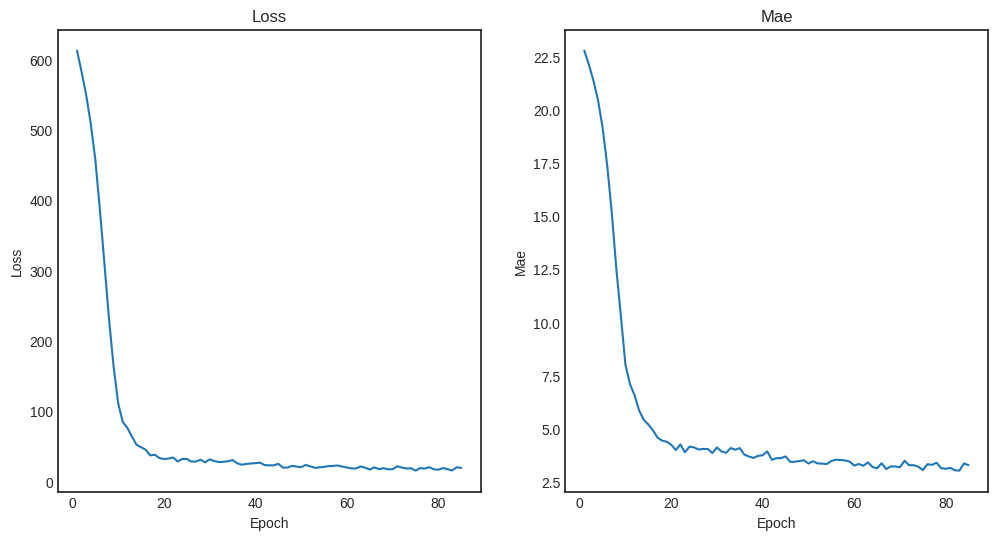

In [46]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
from tensorflow.keras.callbacks import EarlyStopping
epochs = 100
batch_size = 30
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
history = model.fit(train_std, train_labels, epochs = epochs, batch_size = batch_size, validation_data=(val_data, val_labels), callbacks=early_stopping )

epochs = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs,history.history['loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(epochs,history.history['mae'])
plt.title('Mae')
plt.ylabel('Mae')
plt.xlabel('Epoch')

plt.show()

<ipython-input-47-eee1a1311e5a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


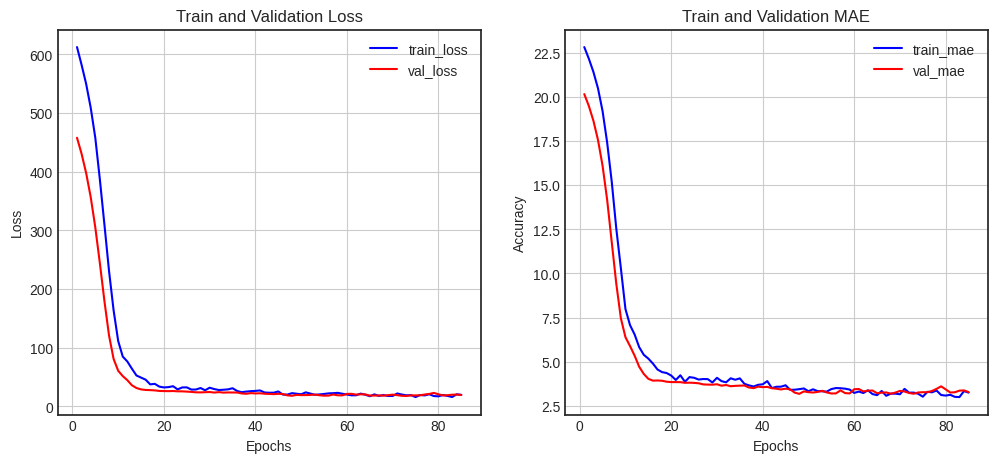

In [47]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [48]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
loss_mse, loss_mae = model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 4ms/step - loss: 7428573.5000 - mae: 2677.9990


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [50]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)
# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(set(train_labels)))
print('-'*50)
print(len(val_data))
print(len(val_labels))
print('-'*50)
print(len(test_data))
print(len(test_labels))


2110848/2110848 [==============================] - 0s 0us/step
6736
46
--------------------------------------------------
2246
2246
--------------------------------------------------
2246
2246


In [51]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

In [52]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
check_point =callbacks.ModelCheckpoint('reuters_model.h5', save_best_only=True)
early_stopping = callbacks.EarlyStopping(patience=10)

history = model.fit(x_train, y_train ,epochs=40, batch_size=512, validation_data=(x_val, y_val),
                    callbacks=[check_point, early_stopping])

Epoch 1/40
14/14 [==============================] - 3s 126ms/step - loss: 3.2716 - accuracy: 0.2985 - val_loss: 3.4741 - val_accuracy: 0.6100
Epoch 2/40
14/14 [==============================] - 1s 73ms/step - loss: 2.1060 - accuracy: 0.5616 - val_loss: 3.1797 - val_accuracy: 0.6692
Epoch 3/40
14/14 [==============================] - 1s 70ms/step - loss: 1.6920 - accuracy: 0.6557 - val_loss: 2.9061 - val_accuracy: 0.7021
Epoch 4/40
14/14 [==============================] - 1s 72ms/step - loss: 1.4351 - accuracy: 0.7025 - val_loss: 2.6622 - val_accuracy: 0.7146
Epoch 5/40
14/14 [==============================] - 1s 70ms/step - loss: 1.2511 - accuracy: 0.7332 - val_loss: 2.4212 - val_accuracy: 0.7191
Epoch 6/40
14/14 [==============================] - 1s 71ms/step - loss: 1.1317 - accuracy: 0.7543 - val_loss: 2.2243 - val_accuracy: 0.7280
Epoch 7/40
14/14 [==============================] - 1s 72ms/step - loss: 1.0010 - accuracy: 0.7806 - val_loss: 2.0385 - val_accuracy: 0.7386
Epoch 8/40
1

<ipython-input-54-ef4da0309378>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


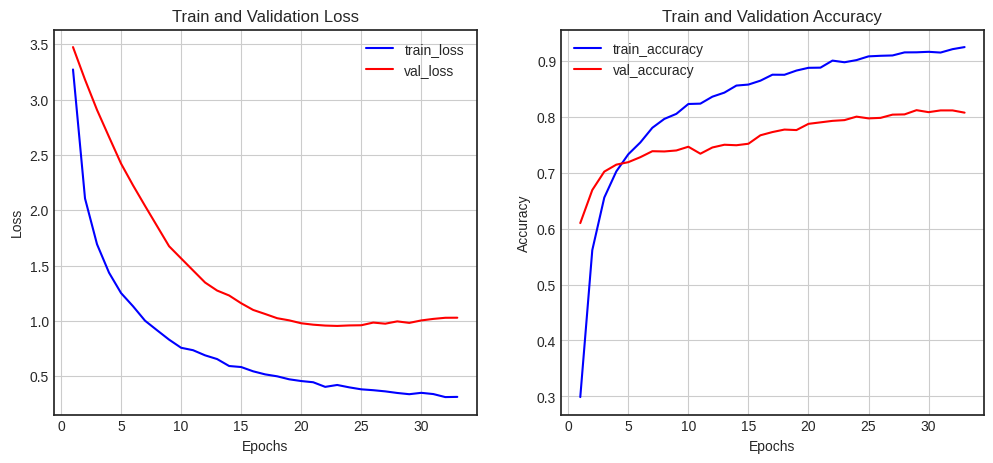

In [54]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [55]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 4ms/step - loss: 1.1438 - accuracy: 0.7881


[1.1437947750091553, 0.7880676984786987]

In [57]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers, callbacks
from tensorflow.keras import callbacks, utils
from tensorflow.keras.datasets import cifar10

170498071/170498071 [==============================] - 3s 0us/step
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


<ipython-input-58-86e2cf80aca5>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


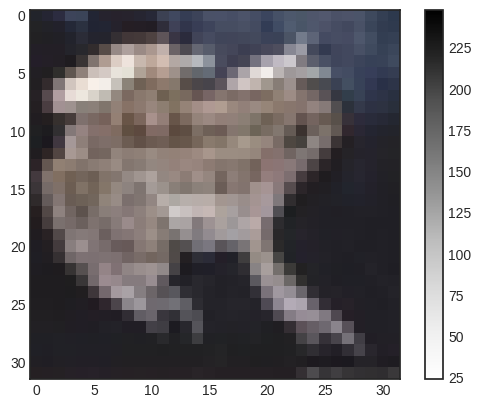

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)
(40000, 3072)
(10000, 3072)
(10000, 3072)


In [58]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
# print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

 # 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32*32*3)
x_val = x_val.reshape(-1, 32*32*3)
x_test = x_test.reshape(-1, 32*32*3)
# 원핫인코딩
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 512)               1573376   
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_28 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_11 (Dropout)        (None, 256)              

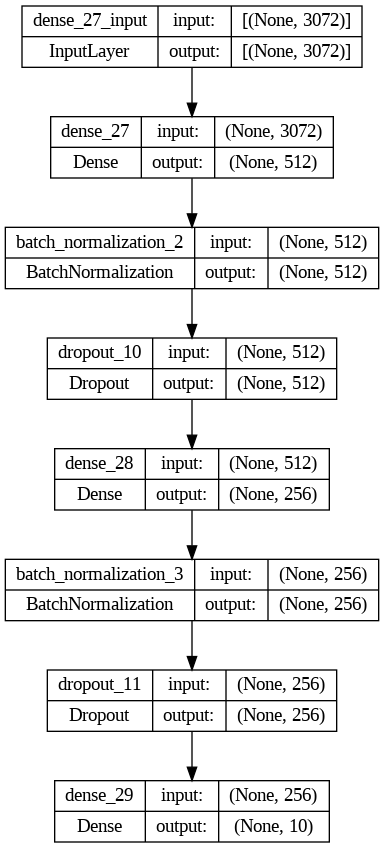

In [59]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(3072,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

utils.plot_model(model, show_shapes=True)



In [63]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
check_point = callbacks.ModelCheckpoint('cifar10_model.h5', save_best_only=True)
early_stopping = callbacks.EarlyStopping(patience=10)

history = model.fit(x_train, y_train,
            epochs=40,
            batch_size=100,
            validation_data=(x_val, y_val),
            callbacks=[check_point, early_stopping])

Epoch 1/40
400/400 [==============================] - 20s 46ms/step - loss: 1.5660 - accuracy: 0.4536 - val_loss: 2.4056 - val_accuracy: 0.2915
Epoch 2/40
400/400 [==============================] - 17s 43ms/step - loss: 1.4401 - accuracy: 0.4895 - val_loss: 1.6219 - val_accuracy: 0.4252
Epoch 3/40
400/400 [==============================] - 18s 44ms/step - loss: 1.3924 - accuracy: 0.5058 - val_loss: 1.7355 - val_accuracy: 0.4089
Epoch 4/40
400/400 [==============================] - 19s 47ms/step - loss: 1.3619 - accuracy: 0.5161 - val_loss: 1.5509 - val_accuracy: 0.4582
Epoch 5/40
400/400 [==============================] - 18s 44ms/step - loss: 1.3335 - accuracy: 0.5260 - val_loss: 1.5803 - val_accuracy: 0.4453
Epoch 6/40
400/400 [==============================] - 18s 45ms/step - loss: 1.3146 - accuracy: 0.5331 - val_loss: 1.6290 - val_accuracy: 0.4461
Epoch 7/40
400/400 [==============================] - 18s 44ms/step - loss: 1.2943 - accuracy: 0.5424 - val_loss: 3.1539 - val_accuracy:

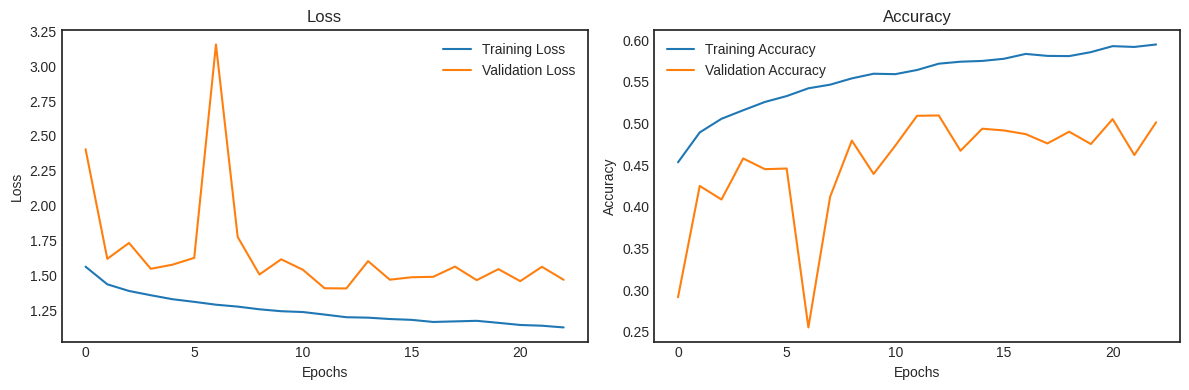

In [64]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.


# 학습 결과 시각화
plt.figure(figsize=(12, 4))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [65]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.4658 - accuracy: 0.5023


[1.4658217430114746, 0.5023000240325928]